# Earthquake dataset

**We will build a machine learning model to predict the magnitude of an earthquake**

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [2]:
df = pd.read_csv('/content/Earthquake.csv')

In [3]:
df.head(7)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,1/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,1/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic


### Retrieving information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

*The dataset has **9 categorical columns** and **12 numerical columns**. Some columns have missing values. The shape of the dataframe shows that there 23412 rows in the dataset and 21 columns/features*

### Description of the dataset

In [5]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [6]:
df.shape

(23412, 21)

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

#### Now we will check for duplicates

In [7]:
df.duplicated().sum()

0

*There are no duplicate rows*

#### Splitting the dataset into training and testing datasets

In [8]:
X = df.drop(columns=["Magnitude"], axis=1)
Y = df.Magnitude

In [9]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle=True)

Joining the training dataframe

In [10]:
df_train = X_train.join(y_train, how='inner')

Joining the testing dataframe

In [11]:
df_test = X_test.join(y_test, how='inner')

Resetting the indices for the training and test dataframes

In [12]:
df_train.reset_index(inplace = True, drop = True)

In [13]:
df_test.reset_index(inplace = True, drop = True)

The indices have been reset in the training and testing dataframes

## Data Preprocessing and cleaning in the training dataframe

Checking if there is any missing value in the training dataframe

In [14]:
df_train.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   15153
Depth Seismic Stations        13067
Magnitude Type                    2
Magnitude Error               18458
Magnitude Seismic Stations    16660
Azimuthal Gap                 12873
Horizontal Distance           17427
Horizontal Error              17786
Root Mean Square               4848
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
Magnitude                         0
dtype: int64

In [15]:
(df.isnull().sum()/len(df))

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.809457
Depth Seismic Stations        0.696865
Magnitude                     0.000000
Magnitude Type                0.000128
Magnitude Error               0.986033
Magnitude Seismic Stations    0.890484
Azimuthal Gap                 0.688237
Horizontal Distance           0.931488
Horizontal Error              0.950624
Root Mean Square              0.258842
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
dtype: float64

There are high number of **missing values** in the columns **Depth Error**, **Magnitude Error**, **Magnitude Seismic Stations**, **Horizontal Distance** and **Horizontal Error**. We can drop these columns as they have large number of missing values. For **Depth Seismic Stations**, **Azimuthal Gap** and **Root Mean Square** column, we can impute the missing values with mean/median value depending upon the distribution.

In [16]:
df_train = df_train.drop(['Depth Error', 'Magnitude Error', 'Magnitude Seismic Stations', 'Horizontal Distance', 'Horizontal Error'], axis=1)

In [17]:
df_train = df_train.dropna(subset=['Magnitude Type'])

*We have dropped the rows corresponding to the 2 missing values in the column **Magnitude Type**. For the remaining column with missing values, we will impute the them with **mean/median** depending upon the distribution*

In [18]:
df_train.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Seismic Stations    13065
Magnitude Type                0
Azimuthal Gap             12871
Root Mean Square           4846
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
Magnitude                     0
dtype: int64

In [19]:
NaN_features = [feature for feature in df_train.columns if (df_train[feature].count() < df_train.shape[0])]
NaN_features

['Depth Seismic Stations', 'Azimuthal Gap', 'Root Mean Square']

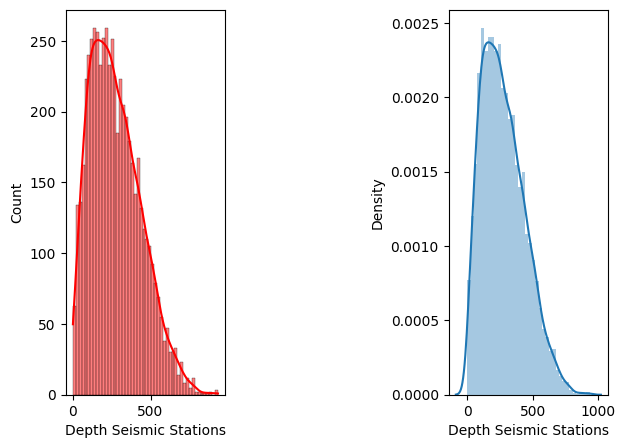

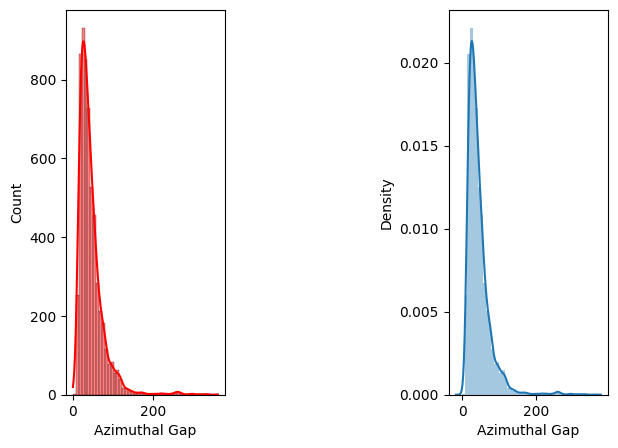

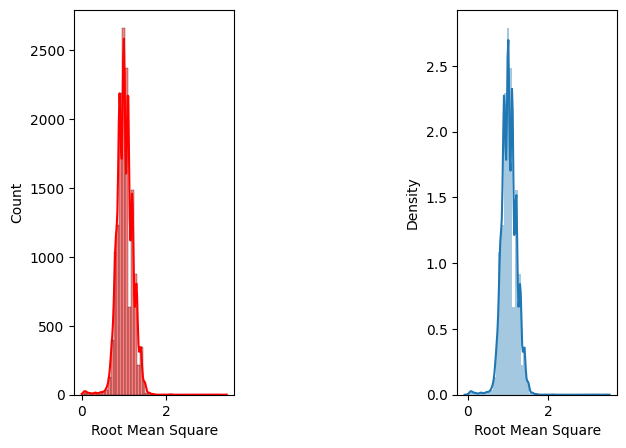

In [20]:
for feature in NaN_features:
    plt.figure(figsize=(7,5))
    plt.subplot(1,3,1)
    #sns.distplot(df_train[feature], color='red')
    sns.histplot(x = df_train[feature].dropna(), kde = True, color='red', bins=50)
    plt.subplot(1,3,3)
    #plt.hist(df_train[feature], bins=20)
    sns.distplot(df_train[feature])

In [21]:
df_train['Depth Seismic Stations'] = df_train['Depth Seismic Stations'].fillna(df_train['Depth Seismic Stations'].median())

In [22]:
df_train['Azimuthal Gap'] = df_train['Azimuthal Gap'].fillna(df_train['Azimuthal Gap'].median())

In [23]:
df_train['Root Mean Square'] = df_train['Root Mean Square'].fillna(df_train['Root Mean Square'].median())

In [24]:
df_train.isnull().sum()

Date                      0
Time                      0
Latitude                  0
Longitude                 0
Type                      0
Depth                     0
Depth Seismic Stations    0
Magnitude Type            0
Azimuthal Gap             0
Root Mean Square          0
ID                        0
Source                    0
Location Source           0
Magnitude Source          0
Status                    0
Magnitude                 0
dtype: int64

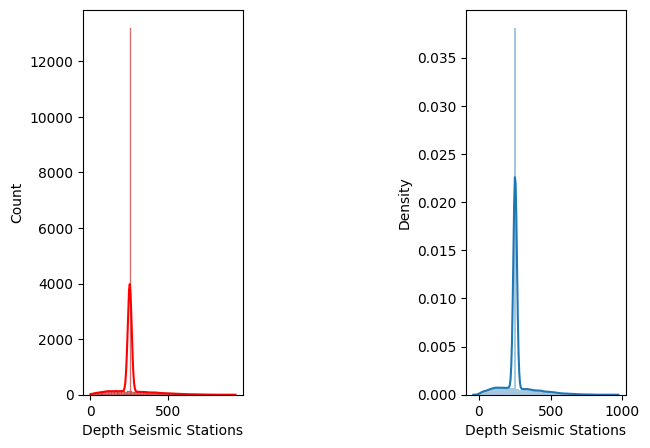

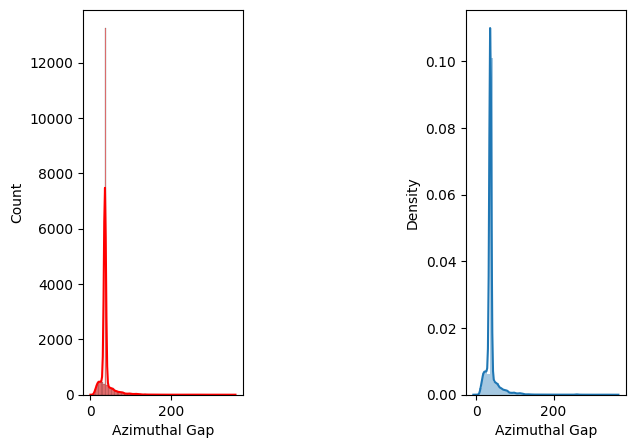

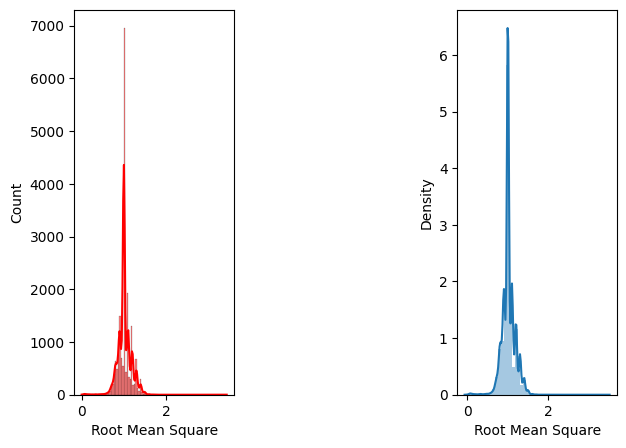

In [25]:
for feature in NaN_features:
    plt.figure(figsize=(7,5))
    plt.subplot(1,3,1)
    #sns.distplot(df_train[feature], color='red')
    sns.histplot(x = df_train[feature].dropna(), kde = True, color='red', bins=100)
    plt.subplot(1,3,3)
    #plt.hist(df_train[feature], bins=20)
    sns.distplot(df_train[feature])

#### Checking for unique values

In [26]:
df_train.nunique()

Date                      10989
Time                      16826
Latitude                  16935
Longitude                 17487
Type                          4
Depth                      3054
Depth Seismic Stations      717
Magnitude Type               10
Azimuthal Gap              1039
Root Mean Square            178
ID                        18727
Source                       12
Location Source              43
Magnitude Source             23
Status                        2
Magnitude                    60
dtype: int64

In [27]:
df_train.shape

(18727, 16)

*The **ID column** has all almost **unique values** and thus it does not contribute to determine the magnitude of the earthquake. So we can drop the ID column*

In [28]:
df_train = df_train.drop(['ID'], axis = 1)

In [29]:
df_train.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth',
       'Depth Seismic Stations', 'Magnitude Type', 'Azimuthal Gap',
       'Root Mean Square', 'Source', 'Location Source', 'Magnitude Source',
       'Status', 'Magnitude'],
      dtype='object')

In [30]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['Magnitude']]

In [31]:
continuous_features

['Latitude',
 'Longitude',
 'Depth',
 'Depth Seismic Stations',
 'Azimuthal Gap',
 'Root Mean Square']

### Plotting Boxplots to identify Univariate outliers

In [32]:
import scipy.stats as stat
import pylab

In [33]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
      plt.figure(figsize=(5,5))
      plt.ticklabel_format(style='plain')
      plt.suptitle("Boxplot and Q-Q plot of " + feature, fontweight="bold", fontsize=15)
      #dataset.boxplot(column=feature)
      plt.subplot(2,3,1)
      sns.boxplot(y=feature, data=dataset, color='orange')
      #plt.ylabel(feature)
      #plt.title(feature)
      plt.subplot(2,3,3)
      stat.probplot(dataset[feature], dist='norm', plot=pylab)
      plt.show()

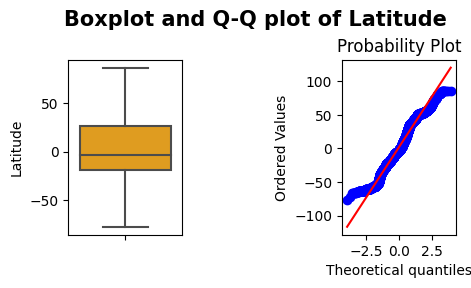

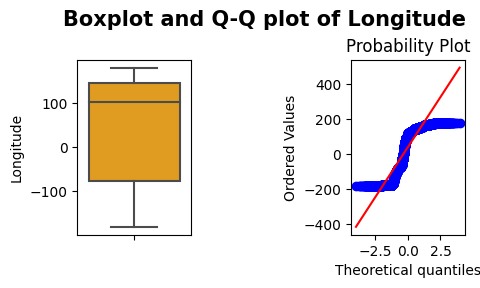

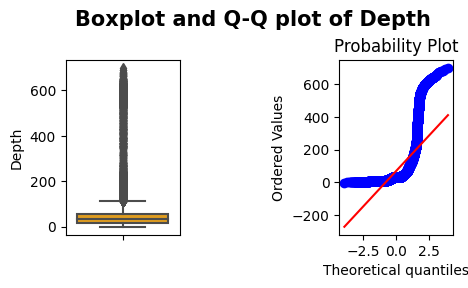

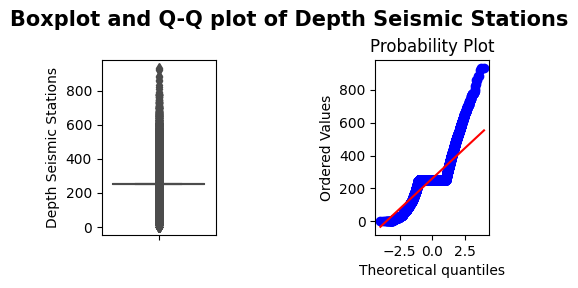

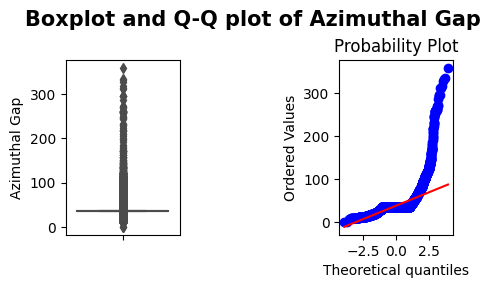

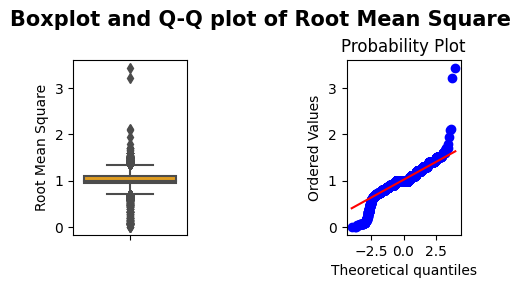

In [34]:
create_boxplots(df_train, continuous_features)

In [35]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        #print(feature, lower_bridge)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        #print(feature, upper_bridge)
        #if lower_bridge != upper_bridge:
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [36]:
remove_outliers(df_train, continuous_features)

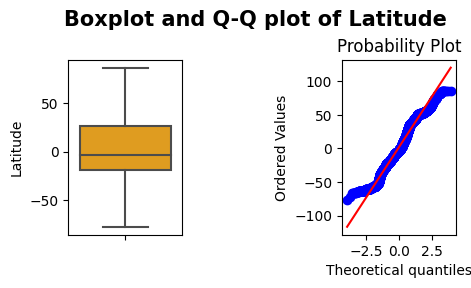

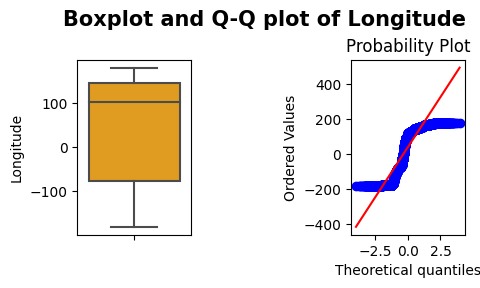

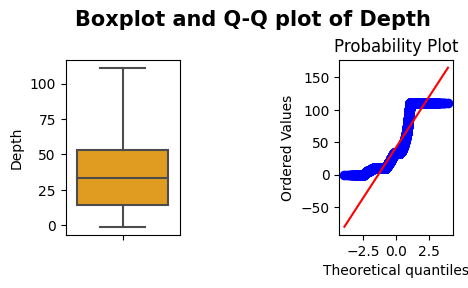

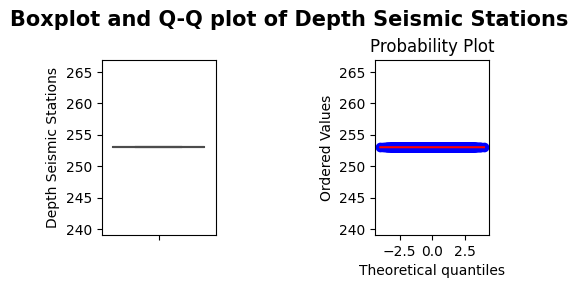

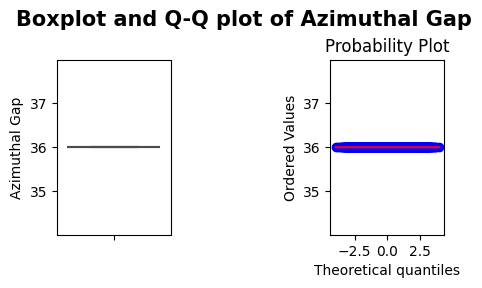

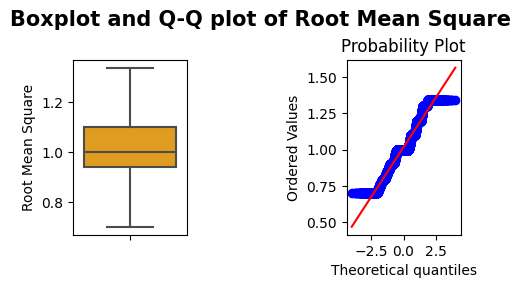

In [37]:
create_boxplots(df_train, continuous_features)

In [38]:
df_train.describe()

,Latitude,Longitude,Depth,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Magnitude
count,18727.000000,18727.000000,18727.000000,18727.0,18727.0,18727.000000,18727.000000
mean,1.766155,39.589574,42.135634,253.0,36.0,1.016695,5.881359
std,30.180708,125.377510,34.466601,0.0,0.0,0.142023,0.421455
min,-77.080000,-179.993000,-1.100000,253.0,36.0,0.700000,5.500000
25%,-18.676000,-76.314650,14.200000,253.0,36.0,0.940000,5.600000
50%,-3.508000,103.162000,33.000000,253.0,36.0,1.000000,5.700000
75%,26.570500,145.103500,53.000000,253.0,36.0,1.100000,6.000000
max,86.005000,179.998000,111.200000,253.0,36.0,1.340000,9.100000


In [39]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,11/29/2007,19:00:20,14.944,-61.274,Earthquake,111.2,253.0,MWB,36.0,0.74,US,US,US,Reviewed,7.4
1,10/28/2011,18:54:34,-14.438,-75.966,Earthquake,24.0,253.0,MWW,36.0,1.00,US,US,US,Reviewed,6.9
2,3/25/2007,13:57:58,38.340,20.420,Earthquake,15.0,253.0,MWB,36.0,1.00,US,ATH,US,Reviewed,5.7
3,5/6/2004,13:43:13,42.525,145.021,Earthquake,28.6,253.0,MWB,36.0,0.80,US,US,US,Reviewed,5.5
4,8/27/1988,16:30:17,-15.864,-172.067,Earthquake,27.9,253.0,MW,36.0,0.90,US,US,HRV,Reviewed,5.7


## Plotting histograms and distplots to check the distributions of continuous variables

In [40]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.suptitle("Histogram and Q-Q plot of variable " + feature, fontweight="bold", fontsize=15)
        plt.subplot(3,5,1)
        plt.ticklabel_format(style='plain')
        #plt.hist(dataset[feature].dropna())
        sns.histplot(x = dataset[feature].dropna(), kde = True)
        plt.title(feature)
        plt.subplot(3,5,3)
        plt.ticklabel_format(style='plain')
        sns.distplot(dataset[feature])
        plt.ylabel('Count/Frequency')
        plt.subplot(3,5,5)
        stat.probplot(dataset[feature], dist='norm', plot=pylab)
        plt.show()

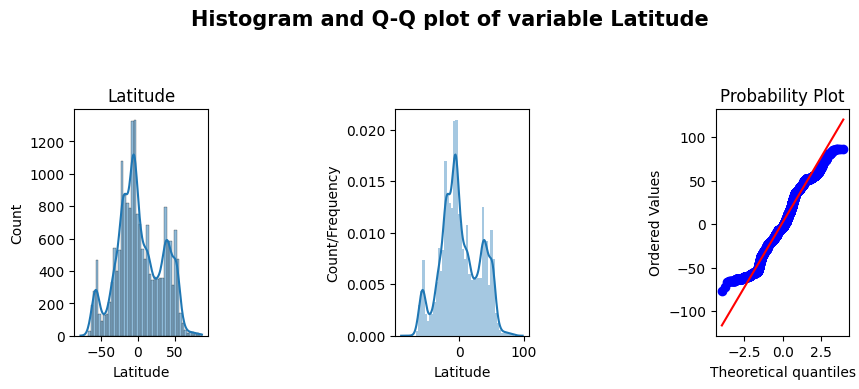

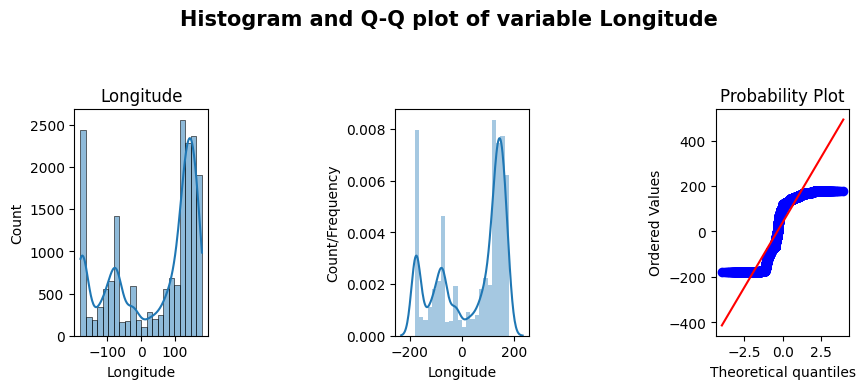

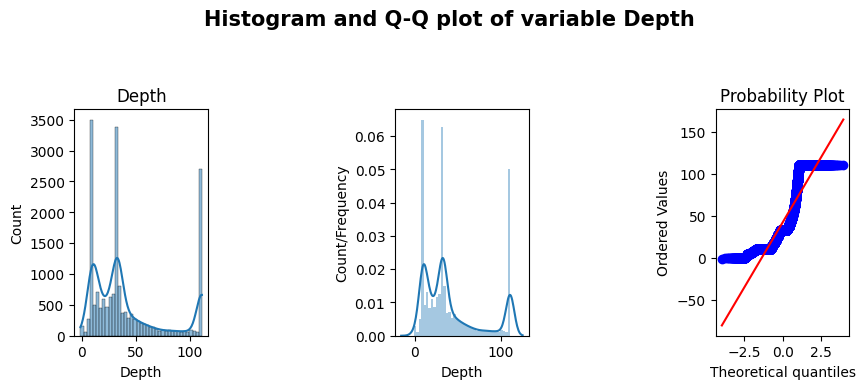

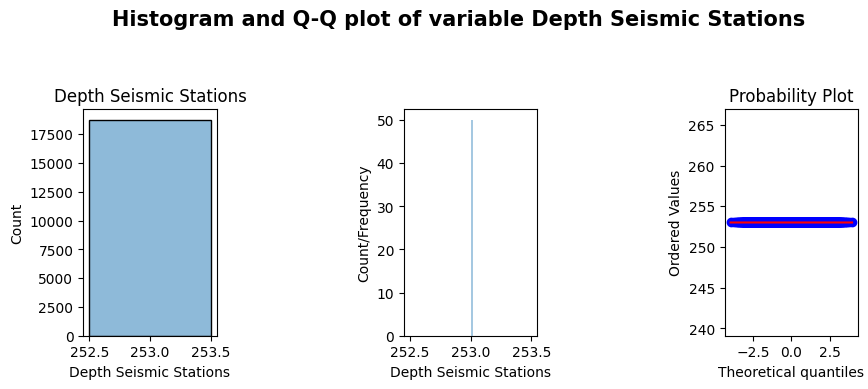

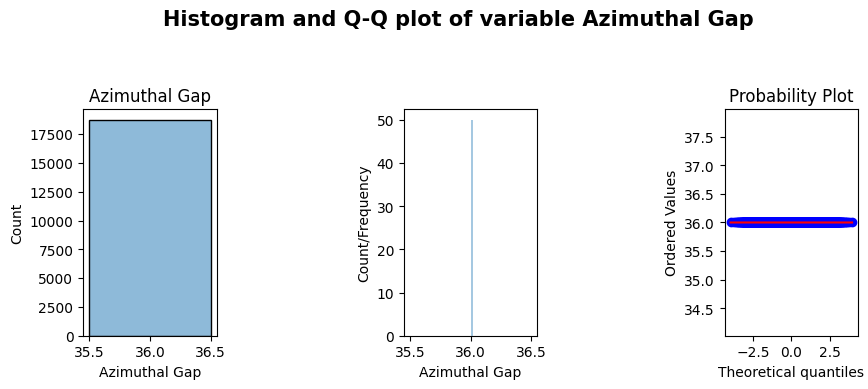

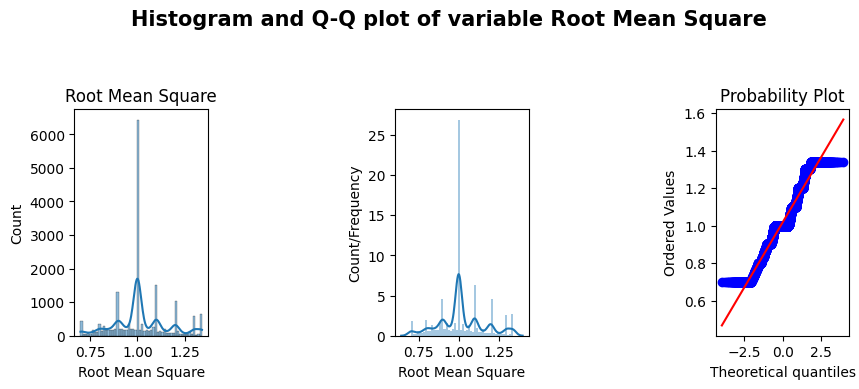

In [41]:
create_histograms_distplots(df_train, continuous_features)

In [42]:
from scipy.stats import skew

In [43]:
df_train['Depth'].min()

-1.1

In [44]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    square_root_transformed_skew_scores = []
    log_transformed_skew_scores = []
    exp_transformed_skew_scores = []
    #boxcox_transformed_skew_scores = []
    for feature in feature_list:
      column_name_square_root = ''
      column_name_log = ''
      variables.append(feature)
      skew_scores.append(skew(dataset[feature]))
      if (float(skew(dataset[feature])) >= 0.5) | (float(skew(dataset[feature])) <= -0.5):
        if dataset[feature].min() > 0:
          column_name_square_root = f'{str(feature)} square root transformed'
          dataset[column_name_square_root] = np.sqrt(dataset[feature])
          column_name_log = f'{str(feature)} log transformed'
          dataset[column_name_log] = np.log(dataset[feature])
          square_root_transformed_skew_scores.append(skew(dataset[column_name_square_root]))
          log_transformed_skew_scores.append(skew(dataset[column_name_log]))
        else:
          square_root_transformed_skew_scores.append('Not transformed')
          log_transformed_skew_scores.append('Not transformed')
        #column_name_exp = f'{str(feature)} exp transformed'
        dataset[feature] = np.exp(dataset[feature])
        exp_transformed_skew_scores.append(skew(dataset[feature]))
        #boxcox_transformed_skew_scores.append(skew(dataset[column_name_exp]))
      else:
        exp_transformed_skew_scores.append('Not transformed')
        #boxcox_transformed_skew_scores.append('Not transformed')
      #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores, 'Skewness score after boxcox transformation of skewed features': boxcox_transformed_skew_scores}
      #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
      skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
      skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [45]:
skewness_score(df_train, continuous_features)

,Feature,Skewness Score before transformation,Skewness score after exponential transformation of skewed features
0,Latitude,0.093417,Not transformed
1,Longitude,-0.598407,11.015077
2,Depth,1.064064,2.065203
3,Depth Seismic Stations,NaN,Not transformed
4,Azimuthal Gap,NaN,Not transformed
5,Root Mean Square,0.257024,Not transformed


In [46]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,11/29/2007,19:00:20,14.944,2.449288e-27,Earthquake,1.965832e+48,253.0,MWB,36.0,0.74,US,US,US,Reviewed,7.4
1,10/28/2011,18:54:34,-14.438,1.019496e-33,Earthquake,2.648912e+10,253.0,MWW,36.0,1.00,US,US,US,Reviewed,6.9
2,3/25/2007,13:57:58,38.340,7.384028e+08,Earthquake,3.269017e+06,253.0,MWB,36.0,1.00,US,ATH,US,Reviewed,5.7
3,5/6/2004,13:43:13,42.525,9.590032e+62,Earthquake,2.635252e+12,253.0,MWB,36.0,0.80,US,US,US,Reviewed,5.5
4,8/27/1988,16:30:17,-15.864,1.871765e-75,Earthquake,1.308628e+12,253.0,MW,36.0,0.90,US,US,HRV,Reviewed,5.7


In [47]:
df_train.describe()

,Latitude,Longitude,Depth,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Magnitude
count,18727.000000,1.872700e+04,1.872700e+04,18727.0,18727.0,18727.000000,18727.000000
mean,1.766155,1.035266e+76,2.773397e+47,253.0,36.0,1.016695,5.881359
std,30.180708,9.424890e+76,6.818258e+47,0.0,0.0,0.142023,0.421455
min,-77.080000,6.761348e-79,3.328711e-01,253.0,36.0,0.700000,5.500000
25%,-18.676000,7.194010e-34,1.468864e+06,253.0,36.0,0.940000,5.600000
50%,-3.508000,6.348737e+44,2.146436e+14,253.0,36.0,1.000000,5.700000
75%,26.570500,1.041514e+63,1.041376e+23,253.0,36.0,1.100000,6.000000
max,86.005000,1.486408e+78,1.965832e+48,253.0,36.0,1.340000,9.100000


#### Now we will perform bivariate analysis by plotting relplot

In [48]:
def create_relplot(dataset, list_of_features, target):
    for feature in list_of_features:
        for bivariate_feature in list_of_features:
            if bivariate_feature != feature:
                plt.figure(figsize=(7,7))
                #plt.ticklabel_format(style='plain')
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue=target)
                plt.show()

<Figure size 700x700 with 0 Axes>

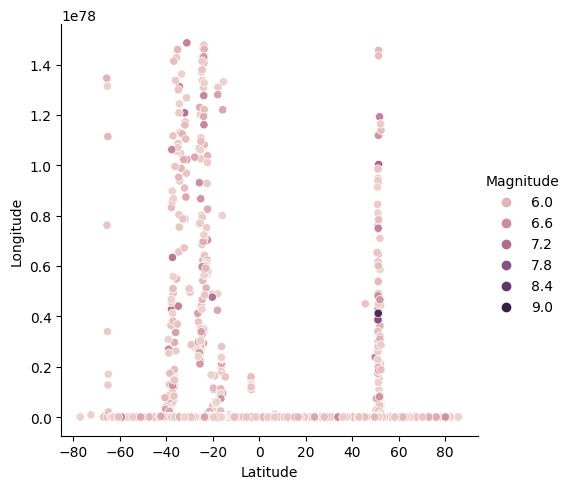

<Figure size 700x700 with 0 Axes>

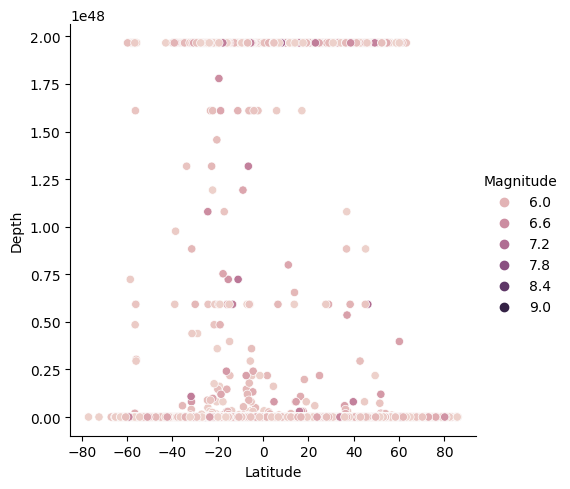

<Figure size 700x700 with 0 Axes>

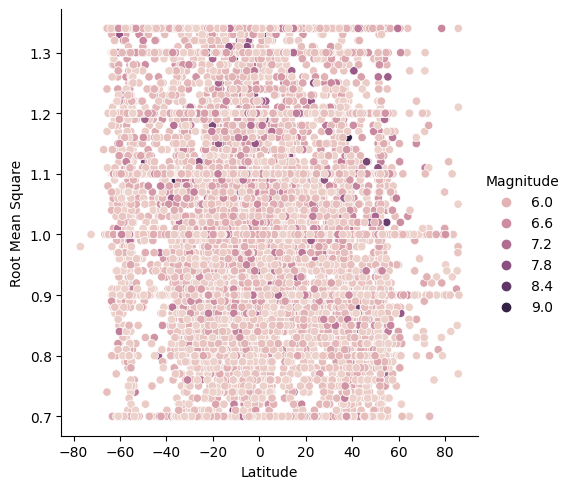

<Figure size 700x700 with 0 Axes>

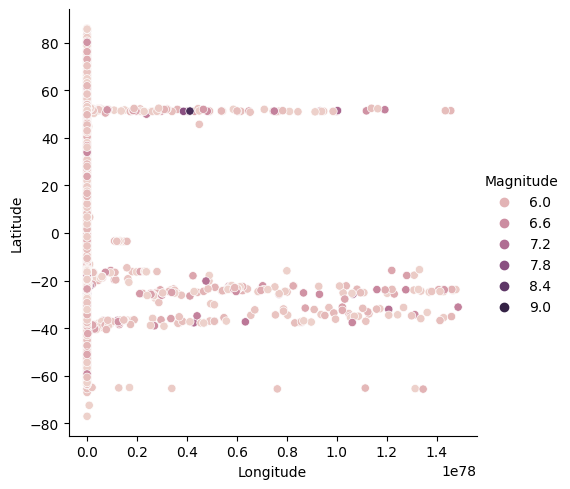

<Figure size 700x700 with 0 Axes>

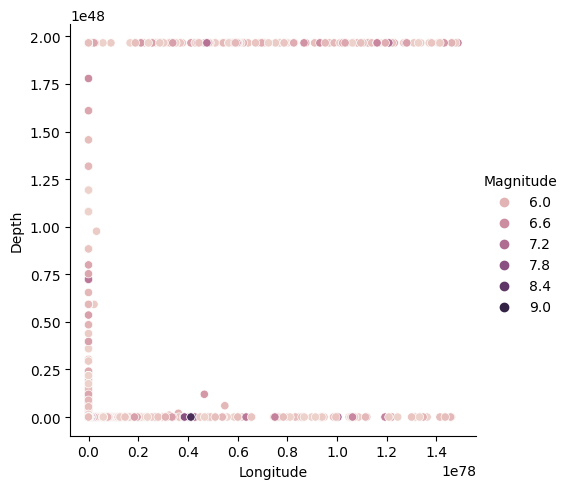

<Figure size 700x700 with 0 Axes>

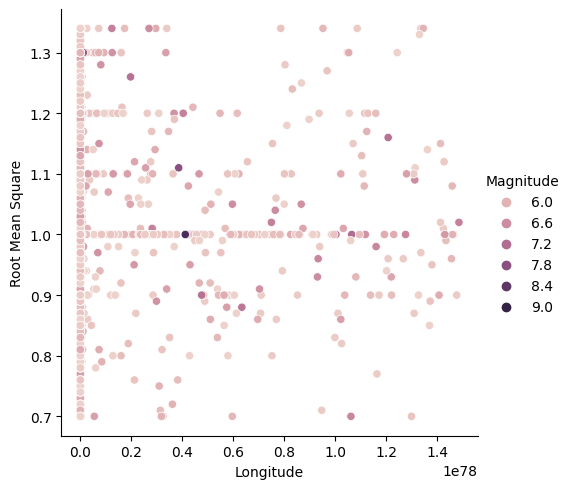

<Figure size 700x700 with 0 Axes>

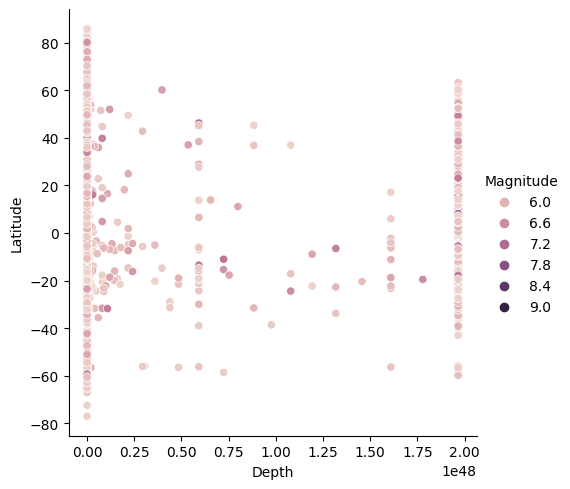

<Figure size 700x700 with 0 Axes>

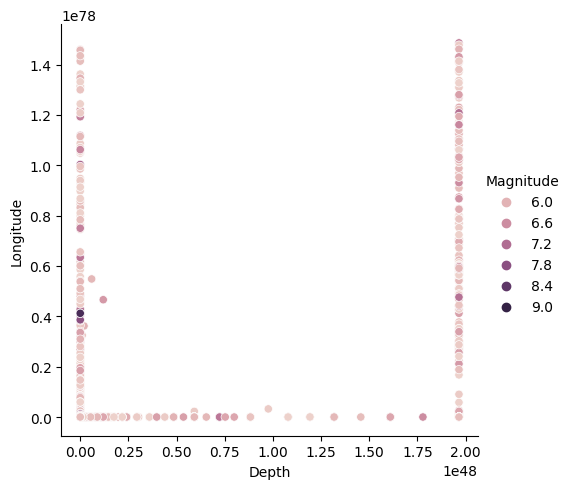

<Figure size 700x700 with 0 Axes>

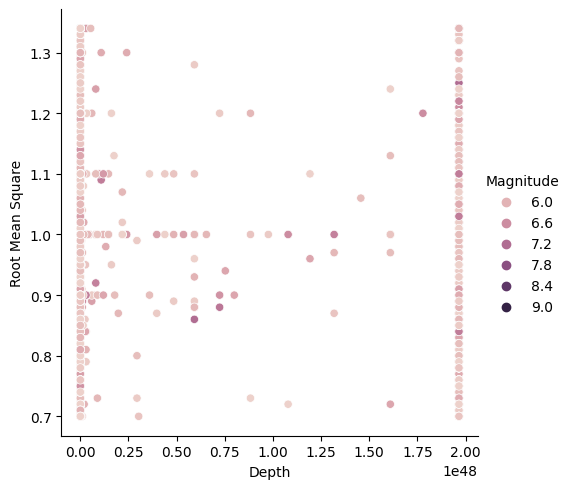

<Figure size 700x700 with 0 Axes>

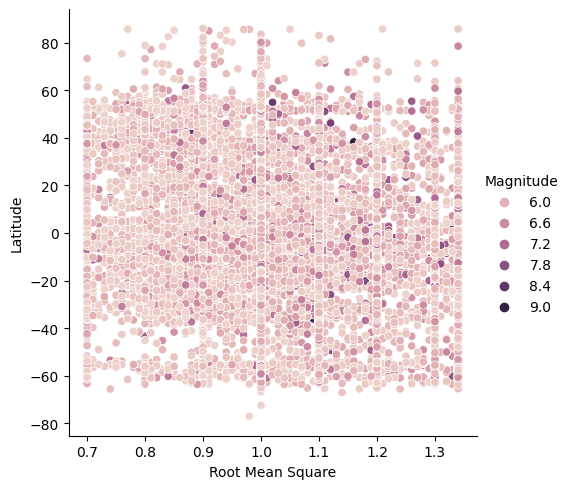

<Figure size 700x700 with 0 Axes>

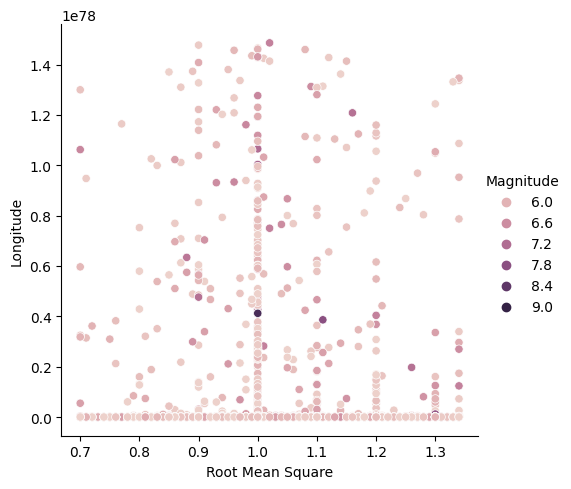

<Figure size 700x700 with 0 Axes>

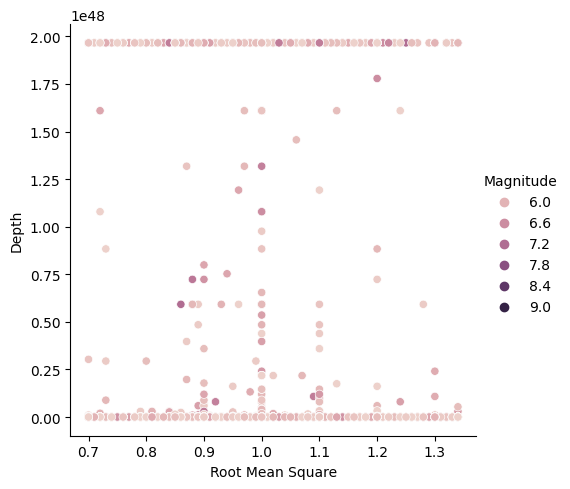

In [49]:
create_relplot(df_train, ['Latitude', 'Longitude', 'Depth', 'Root Mean Square'], 'Magnitude')

In [50]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,11/29/2007,19:00:20,14.944,2.449288e-27,Earthquake,1.965832e+48,253.0,MWB,36.0,0.74,US,US,US,Reviewed,7.4
1,10/28/2011,18:54:34,-14.438,1.019496e-33,Earthquake,2.648912e+10,253.0,MWW,36.0,1.00,US,US,US,Reviewed,6.9
2,3/25/2007,13:57:58,38.340,7.384028e+08,Earthquake,3.269017e+06,253.0,MWB,36.0,1.00,US,ATH,US,Reviewed,5.7
3,5/6/2004,13:43:13,42.525,9.590032e+62,Earthquake,2.635252e+12,253.0,MWB,36.0,0.80,US,US,US,Reviewed,5.5
4,8/27/1988,16:30:17,-15.864,1.871765e-75,Earthquake,1.308628e+12,253.0,MW,36.0,0.90,US,US,HRV,Reviewed,5.7


In [51]:
#df_train.nunique()

In [52]:
def create_FacetGrid(dataset, feature_list):
    for feature in feature_list:
        v = sns.FacetGrid(dataset, col='Magnitude Source', row='Location Source')
        v.map(plt.hist, feature)

In [53]:
#create_FacetGrid(df_train, ['Latitude', 'Longitude', 'Depth', 'Root Mean Square'])

Extracting the categorical features from the data

In [54]:
categorical_features = [feature for feature in df_train.select_dtypes(np.object).columns]

In [55]:
categorical_features

['Date',
 'Time',
 'Type',
 'Magnitude Type',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

In [56]:
df_train[df_train['Date'] == '1985-04-28T02:53:41.530Z']

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
7746,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,6.798643e-32,Earthquake,2.146436e+14,253.0,MW,36.0,1.3,US,US,HRV,Reviewed,5.6


In [57]:
df_train[df_train['Date'] == '1975-02-23T02:58:41.000Z']

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
7708,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,7.675167e+53,Earthquake,1.965832e+48,253.0,MB,36.0,1.0,US,US,US,Reviewed,5.6


In [58]:
import re

In [59]:
df_train['Date'] = [re.sub('T02:[0-9]+:[0-9]+.[0-9]+Z', '', e) for e in df_train['Date']]
df_train['Date'] = [re.sub('-', '/', e) for e in df_train['Date']]

In [60]:
for e in df_train['Date']:
  l = []
  matcher = re.finditer('\d{4}/\d{2}', e)
  for m in matcher:
    l = e.split('/')
    df_train['Date'][df_train['Date'] == e] = f'{l[1]}/{l[2]}/{l[0]}'

In [61]:
df_train['Day'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.day

In [62]:
df_train['Month'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.month

In [63]:
df_train['Year'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.year

In [64]:
df_train.drop(['Date'], axis=1, inplace=True)

In [65]:
df_train[df_train['Time'] == '1985-04-28T02:53:41.530Z']

,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude,Day,Month,Year
7746,1985-04-28T02:53:41.530Z,-32.998,6.798643e-32,Earthquake,2.146436e+14,253.0,MW,36.0,1.3,US,US,HRV,Reviewed,5.6,28,4,1985


In [66]:
df_train[df_train['Time'] == '1975-02-23T02:58:41.000Z']

,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude,Day,Month,Year
7708,1975-02-23T02:58:41.000Z,8.017,7.675167e+53,Earthquake,1.965832e+48,253.0,MB,36.0,1.0,US,US,US,Reviewed,5.6,23,2,1975


In [67]:
df_train['Time'] = [re.sub('[0-9]+-[0-9]+-[0-9]+T', '', e) for e in df_train['Time']]

In [68]:
df_train['Time'] = [re.sub('[.][0-9]+Z', '', e) for e in df_train['Time']]

In [69]:
df_train['Hours'] = pd.to_datetime(df_train['Time'], utc=True).dt.hour

In [70]:
df_train['Minutes'] = pd.to_datetime(df_train['Time'], utc=True).dt.minute

In [71]:
df_train['Seconds'] = pd.to_datetime(df_train['Time'], utc=True).dt.second

In [72]:
df_train.drop(['Time'], axis=1, inplace=True)

In [73]:
df_train.head()

,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude,Day,Month,Year,Hours,Minutes,Seconds
0,14.944,2.449288e-27,Earthquake,1.965832e+48,253.0,MWB,36.0,0.74,US,US,US,Reviewed,7.4,29,11,2007,19,0,20
1,-14.438,1.019496e-33,Earthquake,2.648912e+10,253.0,MWW,36.0,1.00,US,US,US,Reviewed,6.9,28,10,2011,18,54,34
2,38.340,7.384028e+08,Earthquake,3.269017e+06,253.0,MWB,36.0,1.00,US,ATH,US,Reviewed,5.7,25,3,2007,13,57,58
3,42.525,9.590032e+62,Earthquake,2.635252e+12,253.0,MWB,36.0,0.80,US,US,US,Reviewed,5.5,6,5,2004,13,43,13
4,-15.864,1.871765e-75,Earthquake,1.308628e+12,253.0,MW,36.0,0.90,US,US,HRV,Reviewed,5.7,27,8,1988,16,30,17


#### Analysing categorical features

In [ ]:
df_train.head()

In [ ]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df_train[feature].value_counts())
        print()

*We can consider the Nuclear explosion and Explosion as 1 single category*

In [ ]:
df_train["Type"].replace({"Nuclear Explosion": "Explosion"}, inplace=True)

*For the above features, we will remove the categories having counts less than 4*

In [ ]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time' or feature == 'Location Source':
        pass
    else:
        x = df_train[feature].value_counts().keys().tolist()
        y = df_train[feature].value_counts().tolist()
        for i in range(len(x)):
            if y[i] < 4:
                index_names = df_train[df_train[feature] == x[i]].index
                df_train.drop(index_names, inplace = True)
        x = None
        y = None

In [ ]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df_train[feature].value_counts())
        print()

*We can group the categories of **Location Source** column for which the count is less than 29*

In [ ]:
x = df_train['Location Source'].value_counts().keys().tolist()
y = df_train['Location Source'].value_counts().tolist()
for i in range(len(x)):
    if y[i] < 29:
        df_train['Location Source'].replace({x[i]: "Other"}, inplace=True)

In [ ]:
df_train['Location Source'].value_counts()

In [ ]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        sns.countplot(feature, data=df_train)
        plt.title(feature)
        plt.subplot(1,2,2)
        plt.pie(df_train[feature].value_counts(), labels=df_train[feature].unique(), autopct='%0.2f%%')
        plt.show()
        sns.catplot(x=feature, y='Magnitude', data=df_train)
        plt.show()        

*From the plots, we can observe that most of the earthquakes are genuine earthquakes whereas very few earthquakes are due to explosions. 99.24% of the earthquakes are genuine earthquakes whereas 0.76% earthquakes are due to explosions. the magnitude of earthquake ranges from 2.35 to approx 2.70 for genuine earthquakes whereas the magnitude varies from 2.35 to 2.55 in the case of explosions*

*Magnitude Type glossary :*

     MWC : centroid
     MWW : (Moment W-phase)(generic notation Mw)
     MB : short-period body wave
     MWB : body wave
     MS : 20 sec surface wave
     MWW : Moment W-phase)(generic notation Mw
     MWR : regional
     ML : local

#### Working with Date and Time values

In [ ]:
df_train.info()

*Date and Time columns are categorical features. We need to convert Date into datetime object*

In [ ]:
df_train["Date"].replace({"1985-04-28T02:53:41.530Z": "4/28/1985"}, inplace=True)

In [ ]:
df_train["Date"].replace({"2011-03-13T02:23:34.520Z": "3/13/2011"}, inplace=True)

In [ ]:
df_train["Date"].replace({"1975-02-23T02:58:41.000Z": "2/23/1975"}, inplace=True)

In [ ]:
df_train['Day'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.day

In [ ]:
df_train['Month'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.month

In [ ]:
df_train['Year'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.year

In [ ]:
df_train['Year'].value_counts()

*We can drop the Date column*

In [ ]:
df_train.drop(['Date'], axis=1, inplace=True)

In [ ]:
df_train["Time"].replace({"1975-02-23T02:58:41.000Z": "2:58:41"}, inplace=True)

In [ ]:
df_train['Hours'] = pd.to_datetime(df_train['Time'], utc=True).dt.hour

In [ ]:
df_train['Minutes'] = pd.to_datetime(df_train['Time'], utc=True).dt.minute

In [ ]:
df_train['Seconds'] = pd.to_datetime(df_train['Time'], utc=True).dt.second

*We can drop the Date column*

In [ ]:
df_train.drop(['Time'], axis=1, inplace=True)

In [ ]:
df_train.head(5)

In [ ]:
sns.jointplot(y=df_train['Magnitude'], x=df_train['Year'], data=df_train)

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')

In [ ]:
df_train.info()

In [ ]:
df_train.describe()

In [ ]:
df_test.head()

#### Encoding of categorical variables

In [ ]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_train.head()

In [ ]:
X = df_train.iloc[:, df_train.columns != 'Magnitude']

In [ ]:
X.head()

In [ ]:
Y = df_train.iloc[:, 4]

In [ ]:
Y.head()

#### Feature Selection

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor()

In [ ]:
model.fit(X,Y)

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

In [ ]:
plt.figure(figsize=(12,12))
feat_importances.plot(kind='barh')
plt.show()

In [ ]:
df_train.head()

In [ ]:
df_train = df_train.drop(['Status_Reviewed', 'Magnitude Source_UW', 'Magnitude Source_PAR', 'Magnitude Source_OFFICIAL', 'Magnitude Source_ISCGEM', 'Magnitude Source_HRV', 'Magnitude Source_GCMT', 'Magnitude Source_CI', 'Location Source_US', 'Location Source_Other', 'Location Source_NC', 'Location Source_GUC', 'Location Source_GCMT', 'Location Source_CI', 'Source_UW', 'Source_US', 'Source_OFFICIAL', 'Source_NC', 'Source_ISCGEMSUP', 'Source_ISCGEM', 'Source_GCMT', 'Source_CI', 'Magnitude Type_MWR', 'Magnitude Type_ML', 'Magnitude Type_MH', 'Magnitude Type_MD', 'Type_Explosion'], axis = 1)

In [ ]:
df_train.head()

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Instantiating StandardScaler
sc = StandardScaler()

In [ ]:
X_train = df_train.iloc[:, df_train.columns != 'Magnitude']

In [ ]:
Y_train = df_train.iloc[:, 4]

In [ ]:
#Fitting the dataframe X_train onto the standard scaler
df_train_continuous_features_transformed = sc.fit_transform(X_train)

In [ ]:
df_train_continuous_features_transformed

In [ ]:
df_train_continuous_features_scaled = pd.DataFrame({X_train.columns[0]: df_train_continuous_features_transformed[:, 0], X_train.columns[1]: df_train_continuous_features_transformed[:, 1], X_train.columns[2]: df_train_continuous_features_transformed[:, 2], X_train.columns[3]: df_train_continuous_features_transformed[:, 3], X_train.columns[4]: df_train_continuous_features_transformed[:, 4], X_train.columns[5]: df_train_continuous_features_transformed[:, 5], X_train.columns[6]: df_train_continuous_features_transformed[:, 6], X_train.columns[7]: df_train_continuous_features_transformed[:, 7], X_train.columns[8]: df_train_continuous_features_transformed[:, 8], X_train.columns[9]: df_train_continuous_features_transformed[:, 9], X_train.columns[10]: df_train_continuous_features_transformed[:, 10], X_train.columns[11]: df_train_continuous_features_transformed[:, 11], X_train.columns[12]: df_train_continuous_features_transformed[:, 12], X_train.columns[13]: df_train_continuous_features_transformed[:, 13], X_train.columns[14]: df_train_continuous_features_transformed[:, 14], X_train.columns[15]: df_train_continuous_features_transformed[:, 15], X_train.columns[16]: df_train_continuous_features_transformed[:, 16], X_train.columns[17]: df_train_continuous_features_transformed[:, 17]})

In [ ]:
df_train_continuous_features_scaled.head(10)

In [ ]:
df_test.info()

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test = df_test.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error'], axis=1)

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test = df_test.dropna(subset=['Magnitude Type'])

In [ ]:
df_test = df_test.drop(['ID'], axis = 1)

In [ ]:
df_test['Root Mean Square'] = df_test['Root Mean Square'].fillna(df_test['Root Mean Square'].mean())

In [ ]:
df_test.isnull().sum()

In [ ]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df_test[feature].value_counts())
        print()

In [ ]:
df_test["Type"].replace({"Nuclear Explosion": "Explosion"}, inplace=True)

In [ ]:
#df_test_1["Source"].value_counts().keys().tolist()
df_test.head()

In [ ]:
df_test_1 = df_test.copy()

In [ ]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df_test_1[feature].value_counts())
        print()

In [ ]:
for feature in categorical_features:
    if feature == 'Date' or feature == 'Time' or feature == 'Location Source':
        pass
    else:
        print(feature)
        x = df_test_1[feature].value_counts().keys().tolist()
        y = df_test_1[feature].value_counts().tolist()
        print(x)
        print(y)
        for i in range(len(x)):
            if y[i] < 4:
                index_names = df_test_1[df_test_1[feature] == x[i]].index
                df_test_1.drop(index_names, inplace = True)
        x = df_test_1[feature].value_counts().keys().tolist()
        y = df_test_1[feature].value_counts().tolist()
        print(x)
        print(y)
    x = None
    y = None

In [ ]:
df_test_1['Magnitude Type'].value_counts()

In [ ]:
x = df_test_1['Location Source'].value_counts().keys().tolist()
y = df_test_1['Location Source'].value_counts().tolist()
for i in range(len(x)):
    if y[i] < 29:
        df_test_1['Location Source'].replace({x[i]: "Other"}, inplace=True)

In [ ]:
df_test_1['Day'] = pd.to_datetime(df_test_1.Date, format="%m/%d/%Y").dt.day

In [ ]:
df_test_1['Month'] = pd.to_datetime(df_test_1.Date, format="%m/%d/%Y").dt.month

In [ ]:
df_test_1['Year'] = pd.to_datetime(df_test_1.Date, format="%m/%d/%Y").dt.year

In [ ]:
df_test_1.drop(['Date'], axis=1, inplace=True)

In [ ]:
df_test_1['Hours'] = pd.to_datetime(df_test_1['Time'], utc=True).dt.hour

In [ ]:
df_test_1['Minutes'] = pd.to_datetime(df_test_1['Time'], utc=True).dt.minute

In [ ]:
df_test_1['Seconds'] = pd.to_datetime(df_test_1['Time'], utc=True).dt.second

In [ ]:
df_test_1.drop(['Time'], axis=1, inplace=True)

In [ ]:
df_test_1 = pd.get_dummies(df_test_1, drop_first=True)

In [ ]:
df_test_1.columns

In [ ]:
X_test = df_test.iloc[:, df_test.columns != 'Magnitude']

In [ ]:
Y_test = df_test.iloc[:, 4]

In [ ]:
X.head()

In [ ]:
X = X.drop(['Status_Reviewed', 'Magnitude Source_ISCGEM', 'Magnitude Source_HRV', 'Source_US', 'Source_NC', 'Source_ISCGEMSUP', 'Source_ISCGEM', 'Magnitude Type_MWR', 'Magnitude Type_ML', 'Type_Explosion', 'Location Source_Other', 'Location Source_US'], axis = 1)

In [ ]:
df_train_continuous_features_scaled.columns

In [ ]:
X.columns

In [ ]:
#Fitting the dataframe X_train onto the standard scaler
df_test_continuous_features_transformed = sc.transform(X)

In [ ]:
df_test_continuous_features_transformed

In [ ]:
df_test_continuous_features_scaled = pd.DataFrame({X.columns[0]: df_test_continuous_features_transformed[:, 0], X.columns[1]: df_test_continuous_features_transformed[:, 1], X.columns[2]: df_test_continuous_features_transformed[:, 2], X.columns[3]: df_test_continuous_features_transformed[:, 3], X.columns[4]: df_test_continuous_features_transformed[:, 4], X.columns[5]: df_test_continuous_features_transformed[:, 5], X.columns[6]: df_test_continuous_features_transformed[:, 6], X.columns[7]: df_test_continuous_features_transformed[:, 7], X.columns[8]: df_test_continuous_features_transformed[:, 8], X.columns[9]: df_test_continuous_features_transformed[:, 9], X.columns[10]: df_test_continuous_features_transformed[:, 10], X.columns[11]: df_test_continuous_features_transformed[:, 11], X.columns[12]: df_test_continuous_features_transformed[:, 12], X.columns[13]: df_test_continuous_features_transformed[:, 13], X.columns[14]: df_test_continuous_features_transformed[:, 14], X.columns[15]: df_test_continuous_features_transformed[:, 15], X.columns[16]: df_test_continuous_features_transformed[:, 16], X.columns[17]: df_test_continuous_features_transformed[:, 17]})

In [ ]:
df_test_continuous_features_scaled.head(10)

#### Model Building

*We will create a Linear Regression model*

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
#Fitting the training data on the Linear Regression model
regressor.fit(df_train_continuous_features_scaled, Y_train)

In [ ]:
#Intercept of the best fit line of regression
print("Intercept : ", regressor.intercept_)

In [ ]:
regressor.coef_

In [ ]:
y_pred = regressor.predict(df_test_continuous_features_scaled)

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y, y_pred))
print("Mean squared error : ", metrics.mean_squared_error(Y, y_pred))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y, y_pred)))
print("R squared error : ", metrics.mean_squared_error(Y, y_pred))

In [ ]:
sns.distplot(Y-y_pred)

The distplot of the difference the y_test and y_pred is almost a Gaussian distribution

*Now we will build RandomForestRegressor model*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

We will perform hyperparameter tuning for Random Forest Regressor model

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

In [ ]:
rfc = RandomForestRegressor()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, random_state = 42, verbose = 2, n_jobs=1)

In [ ]:
rsc.fit(X_train, y_train)

In [ ]:
prediction = rsc.predict(X_test)
prediction

In [ ]:
y_test

In [ ]:
rsc.best_params_

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(y_test, prediction))
print("Mean squared error : ", metrics.mean_squared_error(y_test, prediction))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
prediction[2109], y_test.tolist()[2109]

In [ ]:
prediction[1109], y_test.tolist()[1109]

In [ ]:
prediction[709], y_test.tolist()[709]